# Classification problem

### Import basic packages

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Load data


In [4]:
data = pd.read_csv('classifier_test_data.csv')

In [5]:
data.head(5)


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,label
0,-0.639091,level_2,-0.037696,-0.127812,-0.168194,-0.045340,-0.003144,-0.015730,0
1,0.010371,level_3,-0.068052,-0.127812,-0.168194,-0.032994,-0.004076,-0.014531,0
2,0.127899,level_2,0.047852,-0.127812,-0.168194,0.004043,-0.010606,0.039139,1
3,-0.059165,level_3,0.020358,-0.127812,-0.168194,-0.045340,-0.003144,-0.005976,0
4,0.009237,level_3,0.292756,-0.127812,0.406844,0.004043,0.004319,-0.215709,0


In [51]:
#data contains 700 rows 9 columns
data.shape

(700, 9)

In [6]:
#Col_2 data_type is different we have to encode it.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   700 non-null    float64
 1   col_2   700 non-null    object 
 2   col_3   700 non-null    float64
 3   col_4   700 non-null    float64
 4   col_5   700 non-null    float64
 5   col_6   700 non-null    float64
 6   col_7   700 non-null    float64
 7   col_8   700 non-null    float64
 8   label   700 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 49.3+ KB


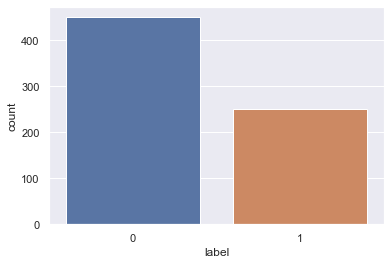

In [7]:
#Checking count of 0's and 1's in label column.Count of 0's are more so classifier will get good training for samples of 0.
sns.set(style="darkgrid")
ax = sns.countplot(x='label',data=data)


# Preprocess data

In [7]:
#Checking Null values in input data
data.isnull().sum()


col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
col_6    0
col_7    0
col_8    0
label    0
dtype: int64

In [8]:
#Checking number of unique categories in col_2
data.col_2.unique() 


array(['level_2', 'level_3', 'level_1', 'level_4'], dtype=object)

In [9]:
#Encode each categories (level_1 : 0 , level_2 : 1 , level_3 : 2 , level_4 : 3)
lb = LabelEncoder()
data["col_2"] = lb.fit_transform(data["col_2"])


In [10]:
data.col_2.unique() 


array([1, 2, 0, 3])

In [11]:
data.head(5)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,label
0,-0.639091,1,-0.037696,-0.127812,-0.168194,-0.045340,-0.003144,-0.015730,0
1,0.010371,2,-0.068052,-0.127812,-0.168194,-0.032994,-0.004076,-0.014531,0
2,0.127899,1,0.047852,-0.127812,-0.168194,0.004043,-0.010606,0.039139,1
3,-0.059165,2,0.020358,-0.127812,-0.168194,-0.045340,-0.003144,-0.005976,0
4,0.009237,2,0.292756,-0.127812,0.406844,0.004043,0.004319,-0.215709,0


In [12]:
#Since entire data is standardize in range 0 to 1 . Converting col_2 in range of 0-1 with mean= 0
x = data['col_2'].values #returns a numpy array
x = x.reshape(-1,1)
scaler = MinMaxScaler()
scaler = scaler.fit(x)

In [13]:

x_scaled = scaler.transform(x)
print(x_scaled)


[[0.33333333]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.        ]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.33333333]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [0.66

In [14]:
data['col_2'] = x_scaled
print(data.head(5))

      col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0 -0.639091  0.333333 -0.037696 -0.127812 -0.168194 -0.045340 -0.003144   
1  0.010371  0.666667 -0.068052 -0.127812 -0.168194 -0.032994 -0.004076   
2  0.127899  0.333333  0.047852 -0.127812 -0.168194  0.004043 -0.010606   
3 -0.059165  0.666667  0.020358 -0.127812 -0.168194 -0.045340 -0.003144   
4  0.009237  0.666667  0.292756 -0.127812  0.406844  0.004043  0.004319   

      col_8  label  
0 -0.015730      0  
1 -0.014531      0  
2  0.039139      1  
3 -0.005976      0  
4 -0.215709      0  


In [15]:
data['col_2'].mean()

0.5404761904761916

# Splitting the dataset

In [44]:
#X contains input features , Y contains output label
X = data[['col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8']]
y = data['label']
X = X.values.astype('float'); y = y.values.astype('int')

#Spliting 20% of data for testing.
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state = 42)


In [45]:
#Training data contains 560 rows with 8 columns
X_train.shape

(560, 8)

In [46]:
#Test data contains 140 rows with 8 columns
X_test.shape

(140, 8)

# Logistic Regression Model


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [48]:
#predicting the values
y_pred = model.predict(X_test)


# Evaluation of Logistic Regression Model


1 . Accuracy 

It is the ratio of number of correct predictions to the total number of predictions made.
It works well only if there are equal number of samples belonging to each class.

In [49]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)


Accuracy score using Logistic Regression: 68.57142857142857


In [50]:
predicted = {'Predicted':y_pred, 'Actual':y_test} 
df = pd.DataFrame(predicted) 
  
# print dataframe. 
df 

,Predicted,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
135,0,0
136,0,1
137,0,0
138,1,1


In [51]:
#row 647
model.predict([[-0.007854985,1,0.003927635,-0.1278125,-0.168194307,-0.045339506,-0.003143657,-0.018938042]])


array([0])

2 . Confusion Matrix for Evaluation

A confusion matrix is a tabular way of visualizing the performance of your prediction model. Each entry in a confusion matrix denotes the number of predictions made by the model where it classified the classes correctly or incorrectly.

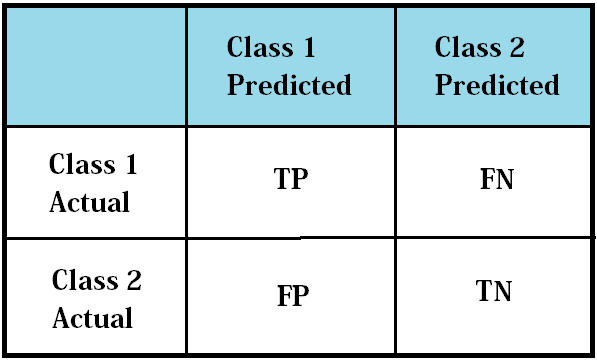

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat



array([[83,  7],
       [37, 13]], dtype=int64)

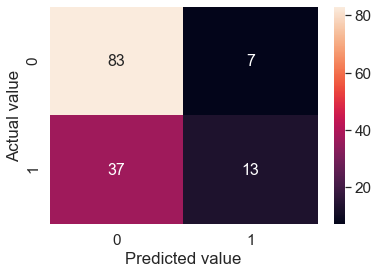

In [55]:
#Count of 0's in test data is 90 and count of 1's in test data is 50

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf_mat, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

3 . Classification Report 


In [153]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.92      0.79        90
     class 1       0.65      0.26      0.37        50

    accuracy                           0.69       140
   macro avg       0.67      0.59      0.58       140
weighted avg       0.68      0.69      0.64       140



4 . AUC - ROC Curve

<ipython-input-154-8c063fb0e3ab>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-154-8c063fb0e3ab>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-154-8c063fb0e3ab>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-154-8c063fb0e3ab>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-154-8c063fb0e3ab>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-154-8c063fb0e3ab>:15: DeprecationWarning: scipy.in

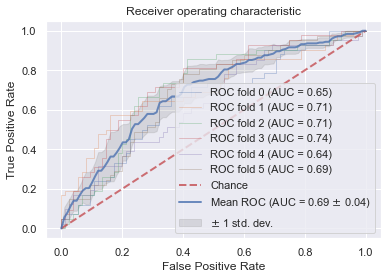

In [154]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(n_splits=6)
plt.figure()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN Model Fitting

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred = knn_classifier.predict(X_test)


# Evaluation of KNeighbours Classifier


In [78]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)


Accuracy score using KNN: 72.85714285714285


In [79]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.90      0.81        90
     class 1       0.70      0.42      0.53        50

    accuracy                           0.73       140
   macro avg       0.72      0.66      0.67       140
weighted avg       0.72      0.73      0.71       140



In [80]:
knn_cnn = confusion_matrix(y_test, y_pred)


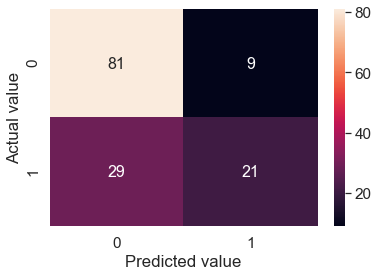

In [81]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(knn_cnn, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

<ipython-input-82-f66789a0f76b>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-82-f66789a0f76b>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-82-f66789a0f76b>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-82-f66789a0f76b>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-82-f66789a0f76b>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-82-f66789a0f76b>:16: DeprecationWarning: scipy.interp i

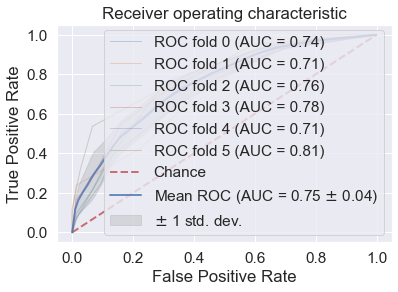

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
from scipy import interp
cv = StratifiedKFold(n_splits=6)
plt.figure()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = knn_classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Classification Model

In [98]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using SVC:", acc*100)


Accuracy score using SVC: 66.42857142857143


In [84]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.68      0.90      0.78        90
     class 1       0.57      0.24      0.34        50

    accuracy                           0.66       140
   macro avg       0.63      0.57      0.56       140
weighted avg       0.64      0.66      0.62       140



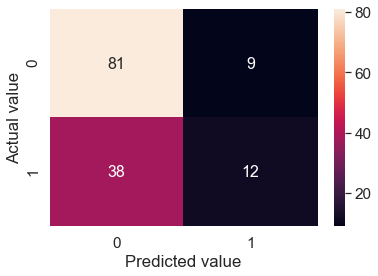

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

svc_cnn = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(svc_cnn, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

<ipython-input-86-0117bd16b759>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-86-0117bd16b759>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-86-0117bd16b759>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-86-0117bd16b759>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-86-0117bd16b759>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-86-0117bd16b759>:15: DeprecationWarning: scipy.interp i

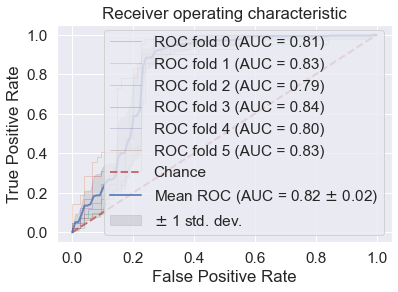

In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(n_splits=6)
plt.figure()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = svc_classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
d_classifier.fit(X_train, y_train)
y_pred = d_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Decision Tree:", acc*100)


Accuracy score using Decision Tree: 80.71428571428572


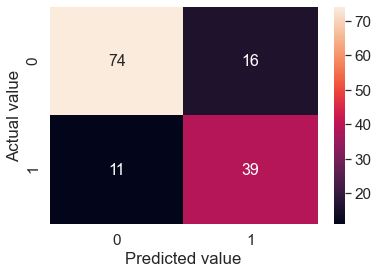

In [92]:
dt_cnn = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(dt_cnn, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

<ipython-input-93-47fef865c771>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-93-47fef865c771>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-93-47fef865c771>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-93-47fef865c771>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-93-47fef865c771>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-93-47fef865c771>:15: DeprecationWarning: scipy.interp i

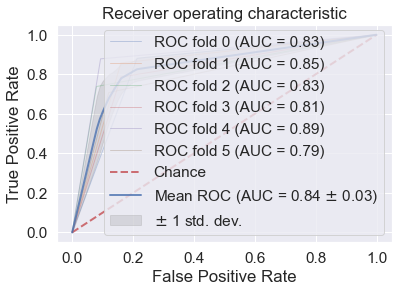

In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(n_splits=6)
plt.figure()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = d_classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
r_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
r_classifier.fit(X_train, y_train)
y_pred = r_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Random Forest Classifier:", acc*100)


Accuracy score using Random Forest Classifier: 89.28571428571429


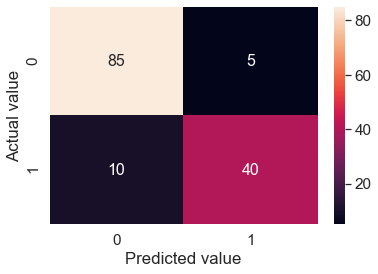

In [106]:
rf_cnn = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(rf_cnn, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

<ipython-input-107-fa8ffd4075c5>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-107-fa8ffd4075c5>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-107-fa8ffd4075c5>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-107-fa8ffd4075c5>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-107-fa8ffd4075c5>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-107-fa8ffd4075c5>:15: DeprecationWarning: scipy.in

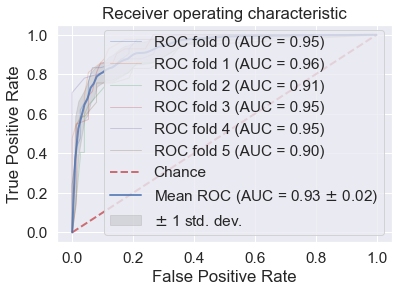

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(n_splits=6)
plt.figure()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = r_classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

In [ ]:
Note - Since Its Classification task not regression we cannot use rmse to evaluate model thats why I didn't.